In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
print(plt.style.available)
import seaborn as sns

# Load data
def load_and_explore_data():
   df = pd.read_csv('C:/Users/alves/Desktop/Estudos/AI/Trabalho_1/dataset.csv')
   return df


df = load_and_explore_data()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


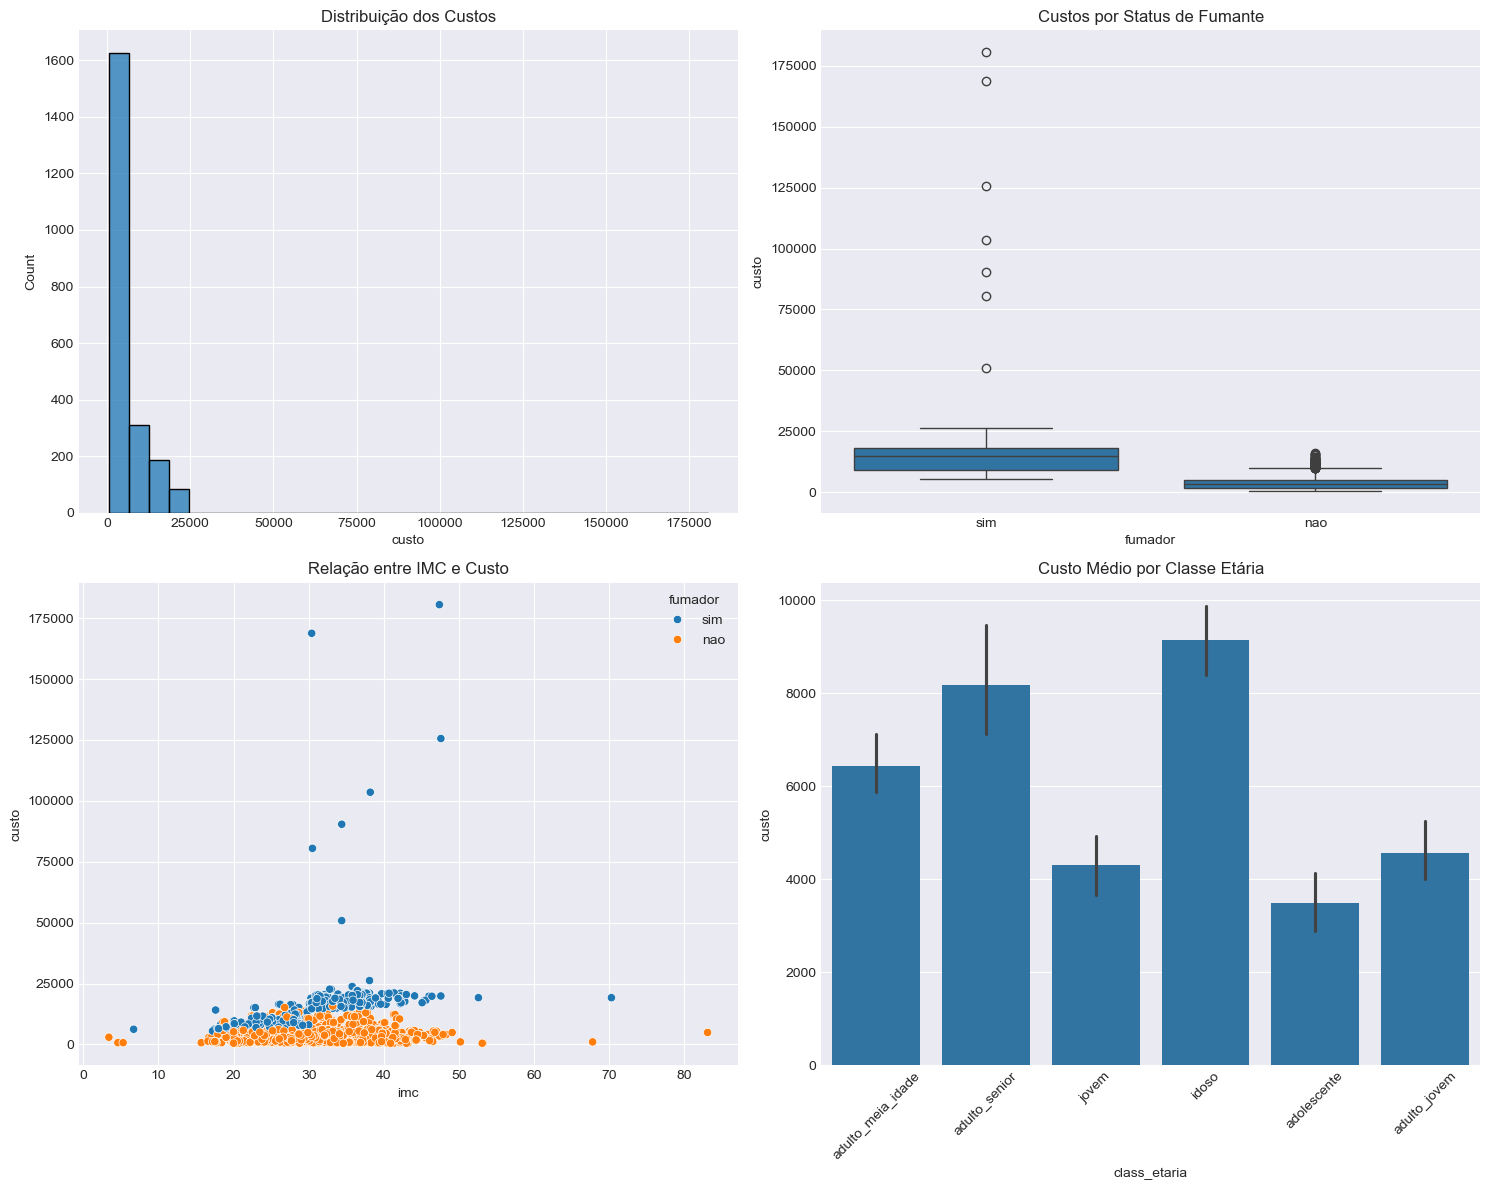

In [2]:
def create_visualizations(df):
    # Set up the plotting style
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Distribution of costs
    sns.histplot(data=df, x='custo', bins=30, ax=axes[0,0])
    axes[0,0].set_title('Distribuição dos Custos')
    
    # Costs by smoking status
    sns.boxplot(data=df, x='fumador', y='custo', ax=axes[0,1])
    axes[0,1].set_title('Custos por Status de Fumante')
    
    # Relationship between BMI and cost
    sns.scatterplot(data=df, x='imc', y='custo', hue='fumador', ax=axes[1,0])
    axes[1,0].set_title('Relação entre IMC e Custo')
    
    # Average cost by age class
    sns.barplot(data=df, x='class_etaria', y='custo', ax=axes[1,1])
    axes[1,1].set_title('Custo Médio por Classe Etária')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Create visualizations
create_visualizations(df)

In [3]:
def preprocess_data(df):
    # Create dummy variables for categorical columns
    categorical_columns = ['genero', 'estado_civil', 'zona_residencia', 'fumador', 'class_etaria']
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    
    # Separate features and target
    X = df_encoded.drop('custo', axis=1)
    y = df_encoded['custo']
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X_scaled, y, scaler, X.columns

# Preprocess data
X, y, scaler, feature_names = preprocess_data(df)

In [4]:
def train_model(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define parameter grid for GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf']  # Simplified parameter grid for faster execution
    }
    
    # Create and train model using GridSearchCV
    svm = SVR()
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Evaluate model
    train_score = r2_score(y_train, best_model.predict(X_train))
    test_score = r2_score(y_test, best_model.predict(X_test))
    
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Train R² Score: {train_score:.4f}")
    print(f"Test R² Score: {test_score:.4f}")
    
    return best_model

# Train model
model = train_model(X, y)

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Train R² Score: 0.2491
Test R² Score: 0.1470


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

def train_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model using R² score
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    print(f"Train R² Score: {train_score:.4f}")
    print(f"Test R² Score: {test_score:.4f}")
    
    return model

# Train the model using the data
model = train_model(X, y)


Train R² Score: 0.4374
Test R² Score: 0.2858


In [6]:
#Com Lasso

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Preprocessamento dos dados (assumindo que já tem a função 'preprocess_data' definida)
def preprocess_data(df):
    # Criação das variáveis dummy para colunas categóricas
    categorical_columns = ['genero', 'estado_civil', 'zona_residencia', 'fumador', 'class_etaria']
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    
    # Separação entre variáveis independentes (X) e variável dependente (y)
    X = df_encoded.drop('custo', axis=1)
    y = df_encoded['custo']
    
    # Normalização das variáveis
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X_scaled, y, scaler, X.columns

# Carregando e preprocessando os dados
df = pd.read_csv('C:/Users/alves/Desktop/Estudos/AI/Trabalho_1/dataset.csv')
X, y, scaler, feature_names = preprocess_data(df)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=10000) 

# Treinamento do modelo
lasso.fit(X_train, y_train)

# Previsões para o conjunto de treino e teste
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Avaliação do modelo usando R²
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

# Exibição dos resultados
print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")


Train R² Score: 0.4393
Test R² Score: 0.2872


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def tune_random_forest(X, y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the parameter grid for RandomForestRegressor
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Initialize the RandomForestRegressor
    rf = RandomForestRegressor(random_state=42)
    
    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_rf_model = grid_search.best_estimator_
    
    # Evaluate the best model on train and test data
    y_train_pred = best_rf_model.predict(X_train)
    y_test_pred = best_rf_model.predict(X_test)
    
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Train R² Score: {train_score:.4f}")
    print(f"Test R² Score: {test_score:.4f}")
    
    return best_rf_model

# Tune Random Forest model using GridSearchCV
best_rf_model = tune_random_forest(X, y)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train R² Score: 0.9338
Test R² Score: 0.4438


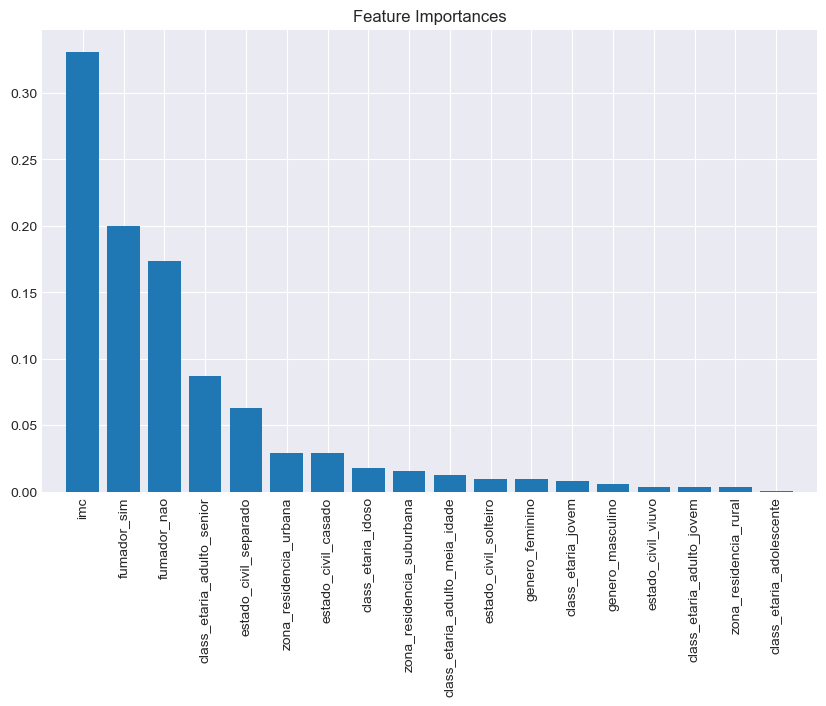

In [8]:
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.show()

# Plot the feature importances of the best model
plot_feature_importances(best_rf_model, feature_names)
